In [ ]:
from nsepy import get_history
from datetime import date
import glob
import pandas as pd
import numpy as np
import time

import warnings
warnings.filterwarnings('ignore')

import nsepy

from nsepy import get_history
import tensorflow as tf


In [ ]:
%run -i C:/WS/Project1/kite_hist_data as kite
# C:/Users/Srujan/Downloads/EAI/kite hist data.py

https://kite.trade/connect/login?api_key=3jshozhjv1djt4ak&v=3
https://kite.trade/?action=login&type=login&status=success&request_token=BSJOep3HdfqykRVs07iwq5QFdn6Walwf
success


In [ ]:
instruments = pd.DataFrame(kite.instruments())

In [ ]:
dd = instruments[(instruments['tradingsymbol'] == 'SBIN') & (instruments['instrument_type'] == 'EQ')]

dd = dd.head(1)
#             to_date = date.today()

from_date = '2017-03-01'

to_date = '2021-12-20'

ttoken = dd['instrument_token'].item()

dt_stock = kite.historical_data(ttoken, from_date, to_date,'day',0,oi=1)

dt_stock = pd.DataFrame(dt_stock)

dt_stock['Symbol'] = 'SBIN'

In [ ]:
dt_stock.to_csv("data_sbi.csv")

In [ ]:
#dt_stock = pd.read_csv("data_sbi_m.csv")

In [ ]:
dt_stock["returns_percentage"] = (dt_stock.close - dt_stock.close.shift(1))/100

In [ ]:
dt_stock["returns_numeric"] = dt_stock.close - dt_stock.close.shift(1)

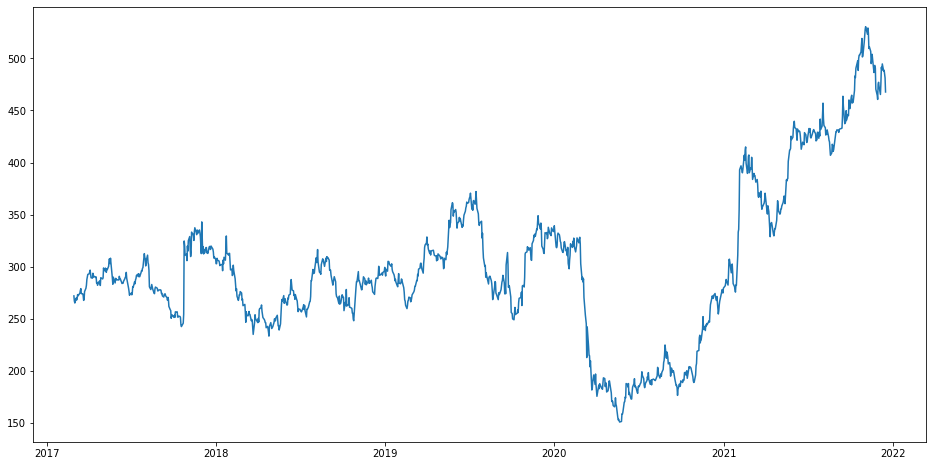

In [ ]:
#setting index as date
dt_stock['date'] = pd.to_datetime(dt_stock.date,format='%Y-%m-%d')
dt_stock.index = dt_stock['date']

#plot
plt.figure(figsize=(16,8))
plt.plot(dt_stock['close'][0:len(dt_stock.close)-1], label='Close Price history')

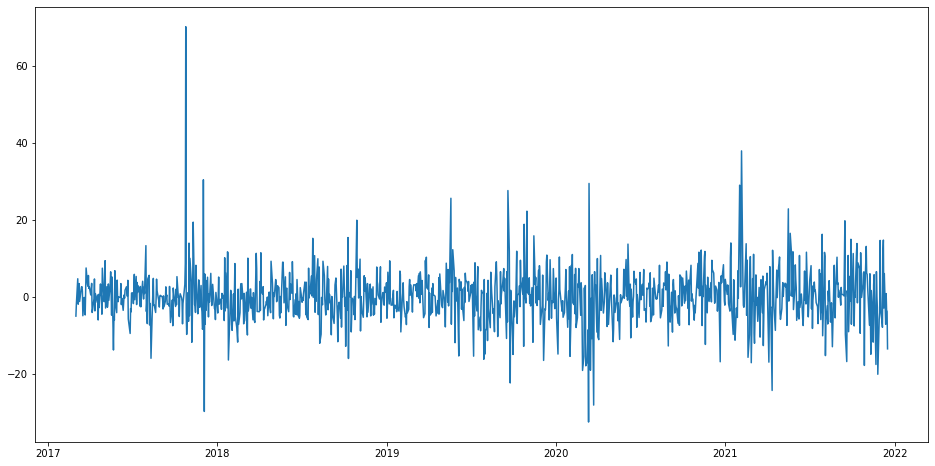

In [ ]:
#setting index as date
dt_stock['date'] = pd.to_datetime(dt_stock.date,format='%Y-%m-%d')
dt_stock.index = dt_stock['date']

#plot
plt.figure(figsize=(16,8))
plt.plot(dt_stock['returns_numeric'][0:len(dt_stock.returns_numeric)-1], label='Returns Price history')

In [ ]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

# unscaled

In [ ]:
#creating dataframe unscaled
data = dt_stock.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(dt_stock)),columns=['date', 'close','volume'])
for i in range(0,len(data)):
    new_data['date'][i] = data['date'][i]
    new_data['close'][i] = data['close'][i]
    new_data['volume'][i] = data['volume'][i]


#setting index
print(new_data.shape)
new_data.index = new_data.date
new_data.drop('date', axis=1, inplace=True)
print(new_data.shape)

#creating train and test sets
dataset = new_data.values
print(dataset.shape)



#print(len(valid))
#converting dataset into x_train and y_train
#scaler = MinMaxScaler(feature_range=(0, 1))
#scaled_data = scaler.fit_transform(dataset)

train = dataset[0:int(len(dataset)*0.7),:]
print("train shape",train.shape)
valid = dataset[int(len(dataset)*0.7):,:]

x_train, y_train = [], []
for i in range(90,len(train)):
    x_train.append(train[i-90:i,])
    y_train.append(train[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

print("x-train 90 days shape",x_train.shape)
print("y-shape 90 days shape",y_train.shape)


x_test, y_test = [], []
for i in range(90,len(valid)):
    x_test.append(valid[i-90:i,])
    y_test.append(valid[i,0])
x_test, y_test = np.array(x_test), np.array(y_test)

#x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
print("x-test 90 days shape",x_test.shape)
print("y-test 90 days shape",y_test.shape)


x_train1 = np.reshape(x_train[0],(1,-1))
for i in range(1,len(x_train)):
    r1 = np.reshape(x_train[i],(1,-1))
    #r2 = np.reshape(x_train[1],(1,-1))
    x_train1 = np.vstack((x_train1,r1))
pd.DataFrame(x_train1).to_csv("train_data_unscaled_lstm.csv")
print(pd.DataFrame(x_train1).head(3))
print("x-train1 90 days shape",x_train1.shape)
#print("x-train1 90 days head ",x_train1.head())
print("y-shape 90 days shape",y_train.shape)


x_test1 = np.reshape(x_test[0],(1,-1))
for i in range(1,len(x_test)):
    r1 = np.reshape(x_test[i],(1,-1))
    #r2 = np.reshape(x_train[1],(1,-1))
    x_test1 = np.vstack((x_test1,r1))
x_test.shape
pd.DataFrame(x_test1).to_csv("test_data_unscaled_lstm.csv")

#print(pd.DataFrame(x_test).head(3))
print("x-test1 90 days shape",x_test.shape)
print("y-test 90 days shape",y_test.shape)


(1191, 3)
(1191, 2)
(1191, 2)
train shape (833, 2)
x-train 90 days shape (743, 90, 2)
y-shape 90 days shape (743,)
x-test 90 days shape (268, 90, 2)
y-test 90 days shape (268,)
      0        1       2        3       4       5       6        7       8    \
0  271.95  1157627   267.0  1130527  265.15  763059   269.9   623060  268.05   
1   267.0  1130527  265.15   763059   269.9  623060  268.05   441030   269.7   
2  265.15   763059   269.9   623060  268.05  441030   269.7  1250732   273.2   

       9    ...    170      171     172      173     174      175     176  \
0   441030  ...  275.0   693654   280.9  1245613   280.2   540634  285.55   
1  1250732  ...  280.9  1245613   280.2   540634  285.55  3605684   283.6   
2  2253195  ...  280.2   540634  285.55  3605684   283.6  1141910   287.4   

       177    178      179  
0  3605684  283.6  1141910  
1  1141910  287.4   657242  
2   657242  288.6   628310  

[3 rows x 180 columns]
x-train1 90 days shape (743, 180)
y-shape 90 days sha

# scaled

In [ ]:
#creating dataframe scaled
data = dt_stock.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(dt_stock)),columns=['date', 'close','volume'])
for i in range(0,len(data)):
    new_data['date'][i] = data['date'][i]
    new_data['close'][i] = data['close'][i]
    new_data['volume'][i] = data['volume'][i]


#setting index
#print(new_data.shape)
new_data.index = new_data.date
new_data.drop('date', axis=1, inplace=True)
print("data shape",new_data.shape)

#creating train and test sets
dataset = new_data.values
#print(dataset.shape)



#print(len(valid))
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
print("Scaling done")
train = scaled_data[0:int(len(scaled_data)*0.7),:]
print("train shape",train.shape)
valid = scaled_data[int(len(scaled_data)*0.7):,:]
print("test shape",valid.shape)


x_train, y_train = [], []
for i in range(90,len(train)):
    x_train.append(train[i-90:i,])
    y_train.append(train[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

print("x-train 90 days shape",x_train.shape)
print("y-shape 90 days shape",y_train.shape)


x_test, y_test = [], []
for i in range(90,len(valid)):
    x_test.append(valid[i-90:i,])
    y_test.append(valid[i,0])
x_test, y_test = np.array(x_test), np.array(y_test)

#x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
print("x-test 90 days shape",x_test.shape)
print("y-test 90 days shape",y_test.shape)


x_train1 = np.reshape(x_train[0],(1,-1))
for i in range(1,len(x_train)):
    r1 = np.reshape(x_train[i],(1,-1))
    #r2 = np.reshape(x_train[1],(1,-1))
    x_train1 = np.vstack((x_train1,r1))
pd.DataFrame(x_train1).to_csv("train_data_lstm.csv")
#print(pd.DataFrame(x_train1).head(3))
print("x-train1 90 days shape",x_train1.shape)
#print("x-train1 90 days head ",x_train1.head())
print("y-shape 90 days shape",y_train.shape)


x_test1 = np.reshape(x_test[0],(1,-1))
for i in range(1,len(x_test)):
    r1 = np.reshape(x_test[i],(1,-1))
    #r2 = np.reshape(x_train[1],(1,-1))
    x_test1 = np.vstack((x_test1,r1))
x_test.shape
pd.DataFrame(x_test1).to_csv("test_data_lstm.csv")

#print(pd.DataFrame(x_test).head(3))
print("x-test1 90 days shape",x_test1.shape)
print("y-test 90 days shape",y_test.shape)


data shape (1191, 2)
Scaling done
train shape (833, 2)
test shape (358, 2)
x-train 90 days shape (743, 90, 2)
y-shape 90 days shape (743,)
x-test 90 days shape (268, 90, 2)
y-test 90 days shape (268,)
x-train1 90 days shape (743, 180)
y-shape 90 days shape (743,)
x-test1 90 days shape (268, 180)
y-test 90 days shape (268,)


In [ ]:
x_train1 = np.reshape(x_train1, (x_train1.shape[0],x_train1.shape[1],1))
print("x-train1 90 days reshaped",x_train1.shape)

x-train1 90 days reshaped (743, 180, 1)


In [ ]:
y_train = np.reshape(y_train, (y_train.shape[0],1,1))
print("y_train 90 days reshaped",y_train.shape)

y_train 90 days reshaped (743, 1, 1)


In [ ]:
x_train1.shape, x_test1.shape

((743, 180, 1), (268, 180))

# Model

In [ ]:
NUM_NEURONS_FirstLayer = 128
NUM_NEURONS_SecondLayer = 64
NUM_NEURONS_ThirdLayer = 16

EPOCHS = 220
#Build the model
model = Sequential()
model.add(LSTM(NUM_NEURONS_FirstLayer,input_shape=(x_train1.shape[1],1), return_sequences=True))
model.add(LSTM(NUM_NEURONS_SecondLayer,input_shape=(NUM_NEURONS_FirstLayer,1)))
#model.add(LSTM(NUM_NEURONS_ThirdLayer,input_shape=(NUM_NEURONS_SecondLayer,1)))
model.add(Dense(1))


x_train1=np.asarray(x_train1).astype(np.float64)
#x_test=np.asarray(x_test).astype(np.float64)
y_train=np.asarray(y_train).astype(np.float64)
#y_test=np.asarray(y_test).astype(np.float64)


model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(tf.convert_to_tensor(x_train1), tf.convert_to_tensor(y_train), epochs=10, batch_size=50, verbose=2)

Epoch 1/10
15/15 - 13s - loss: 0.0251 - 13s/epoch - 895ms/step
Epoch 2/10
15/15 - 7s - loss: 0.0078 - 7s/epoch - 494ms/step
Epoch 3/10
15/15 - 7s - loss: 0.0067 - 7s/epoch - 495ms/step
Epoch 4/10
15/15 - 7s - loss: 0.0057 - 7s/epoch - 495ms/step
Epoch 5/10
15/15 - 7s - loss: 0.0047 - 7s/epoch - 488ms/step
Epoch 6/10
15/15 - 7s - loss: 0.0045 - 7s/epoch - 496ms/step
Epoch 7/10
15/15 - 7s - loss: 0.0044 - 7s/epoch - 476ms/step
Epoch 8/10
15/15 - 8s - loss: 0.0045 - 8s/epoch - 502ms/step
Epoch 9/10


In [ ]:
closing_price = model.predict(x_train1)
print(closing_price.shape)


In [ ]:
df_cp = pd.DataFrame(closing_price)
df_cp[1] = df_cp[0]
df_cp.head()
df_cp = scaler.inverse_transform(df_cp)
a = y_train.reshape(y_train.shape[0],1)
a.shape
a = pd.DataFrame(a)
a[1] = a[0]
a.head()
a = scaler.inverse_transform(a)
a = a[0:len(a),0]

closing_price = df_cp[0:len(df_cp),0]
rms=np.sqrt(np.mean(np.power((a-closing_price),2)))
rms

In [ ]:
plt.plot(a, color = 'red', label = 'Real Stock Price Percentage')
plt.plot(closing_price, color = 'blue', label = 'Predicted Stock Price Percentage')
plt.title('Stock Returns Percentage Prediction by LSTM on Train Data( scaled)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
x_test1.shape

In [ ]:
closing_price = model.predict(x_test1)
print(closing_price.shape)


In [ ]:
df_cp = pd.DataFrame(closing_price)
df_cp[1] = df_cp[0]
df_cp.head()
df_cp = scaler.inverse_transform(df_cp)
a = y_test.reshape(y_test.shape[0],1)
a.shape
a = pd.DataFrame(a)
a[1] = a[0]
a.head()
a = scaler.inverse_transform(a)
a = a[0:len(a),0]

closing_price = df_cp[0:len(df_cp),0]
rms=np.sqrt(np.mean(np.power((a-closing_price),2)))
rms

In [ ]:
actual_pred = pd.DataFrame(closing_price, a)
actual_pred.to_csv("actual_pred_testdata_sbi_model.csv")

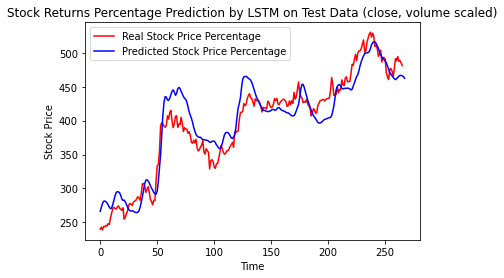

In [ ]:
plt.plot(a[0:len(a)-2], color = 'red', label = 'Real Stock Price Percentage')
plt.plot(closing_price, color = 'blue', label = 'Predicted Stock Price Percentage')
plt.title('Stock Returns Percentage Prediction by LSTM on Test Data (close, volume scaled)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
len(closing_price[0:len(closing_price)-1])
#len(closing_price)
closing_price[-3:-1]
len(a[0:len(a)-2])

In [ ]:
#test_data_lstm = pd.read_csv("test_data_lstm.csv")

In [ ]:
#test_case1 = test_data_lstm[len(test_data_lstm)-1:]
'''closing_price = model.predict(test_case1)
print(closing_price.shape)
df_cp = pd.DataFrame(closing_price)
df_cp[1] = df_cp[0]
df_cp.head()
df_cp = scaler.inverse_transform(df_cp)
pd.DataFrame(df_cp).head() '''

In [ ]:
'''test_case2 = test_data_lstm[len(test_data_lstm)-2:][0:1]
closing_price = model.predict(test_case2)
df_cp = pd.DataFrame(closing_price)
df_cp[1] = df_cp[0]
df_cp.head()
df_cp = scaler.inverse_transform(df_cp)
pd.DataFrame(df_cp).head()'''


In [ ]:
#creating dataframe scaled
data = dt_stock.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(dt_stock)),columns=['date', 'close','volume'])
for i in range(0,len(data)):
    new_data['date'][i] = data['date'][i]
    new_data['close'][i] = data['close'][i]
    new_data['volume'][i] = data['volume'][i]


#setting index
#print(new_data.shape)
new_data.index = new_data.date
new_data.drop('date', axis=1, inplace=True)
print("data shape",new_data.shape)

#creating train and test sets
dataset = new_data.values
#print(dataset.shape)



#print(len(valid))
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
print("Scaling done")
train = scaled_data[0:int(len(scaled_data)*0.80),:]
print("train shape",train.shape)
valid = scaled_data[int(len(scaled_data)*0.80):,:]
print("test shape",valid.shape)


x_train, y_train = [], []
for i in range(90,len(train)):
    x_train.append(train[i-90:i,])
    y_train.append(train[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

print("x-train 90 days shape",x_train.shape)
print("y-shape 90 days shape",y_train.shape)


x_test, y_test = [], []
for i in range(90,len(valid)):
    x_test.append(valid[i-90:i,])
    y_test.append(valid[i,0])
x_test, y_test = np.array(x_test), np.array(y_test)

#x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
print("x-test 90 days shape",x_test.shape)
print("y-test 90 days shape",y_test.shape)


x_train1 = np.reshape(x_train[0],(1,-1))
for i in range(1,len(x_train)):
    r1 = np.reshape(x_train[i],(1,-1))
    #r2 = np.reshape(x_train[1],(1,-1))
    x_train1 = np.vstack((x_train1,r1))
pd.DataFrame(x_train1).to_csv("train_data_lstm.csv")
#print(pd.DataFrame(x_train1).head(3))
print("x-train1 90 days shape",x_train1.shape)
#print("x-train1 90 days head ",x_train1.head())
print("y-shape 90 days shape",y_train.shape)


x_test1 = np.reshape(x_test[0],(1,-1))
for i in range(1,len(x_test)):
    r1 = np.reshape(x_test[i],(1,-1))
    #r2 = np.reshape(x_train[1],(1,-1))
    x_test1 = np.vstack((x_test1,r1))
x_test.shape
pd.DataFrame(x_test1).to_csv("test_data_lstm.csv")

#print(pd.DataFrame(x_test).head(3))
print("x-test1 90 days shape",x_test1.shape)
print("y-test 90 days shape",y_test.shape)


data shape (1191, 2)
Scaling done
train shape (952, 2)
test shape (239, 2)
x-train 90 days shape (862, 90, 2)
y-shape 90 days shape (862,)
x-test 90 days shape (149, 90, 2)
y-test 90 days shape (149,)
x-train1 90 days shape (862, 180)
y-shape 90 days shape (862,)
x-test1 90 days shape (149, 180)
y-test 90 days shape (149,)


In [ ]:
x_train1 = np.reshape(x_train1, (x_train1.shape[0],x_train1.shape[1],1))
print("x-train1 90 days reshaped",x_train1.shape)

x-train1 90 days reshaped (862, 180, 1)


In [ ]:
y_train = np.reshape(y_train, (y_train.shape[0],1,1))
print("y_train 90 days reshaped",y_train.shape)

y_train 90 days reshaped (862, 1, 1)


In [ ]:
x_train1.shape, x_test1.shape

((862, 180, 1), (149, 180))

In [ ]:
NUM_NEURONS_FirstLayer = 128
NUM_NEURONS_SecondLayer = 64
EPOCHS = 220
#Build the model
model = Sequential()
model.add(LSTM(NUM_NEURONS_FirstLayer,input_shape=(x_train1.shape[1],1), return_sequences=True))
model.add(LSTM(NUM_NEURONS_SecondLayer,input_shape=(NUM_NEURONS_FirstLayer,1)))
model.add(Dense(1))


x_train1=np.asarray(x_train1).astype(np.float64)
#x_test=np.asarray(x_test).astype(np.float64)
y_train=np.asarray(y_train).astype(np.float64)
#y_test=np.asarray(y_test).astype(np.float64)


model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(tf.convert_to_tensor(x_train1), tf.convert_to_tensor(y_train), epochs=7, batch_size=50, verbose=2)

Epoch 1/7
18/18 - 15s - loss: 0.0345 - 15s/epoch - 830ms/step
Epoch 2/7
18/18 - 9s - loss: 0.0094 - 9s/epoch - 492ms/step
Epoch 3/7
18/18 - 9s - loss: 0.0073 - 9s/epoch - 487ms/step
Epoch 4/7
18/18 - 9s - loss: 0.0054 - 9s/epoch - 486ms/step
Epoch 5/7
18/18 - 9s - loss: 0.0044 - 9s/epoch - 484ms/step
Epoch 6/7
18/18 - 9s - loss: 0.0049 - 9s/epoch - 486ms/step
Epoch 7/7
18/18 - 9s - loss: 0.0048 - 9s/epoch - 482ms/step


In [ ]:
closing_price = model.predict(x_train1)
print(closing_price.shape)


(862, 1)


In [ ]:
df_cp = pd.DataFrame(closing_price)
df_cp[1] = df_cp[0]
df_cp.head()
df_cp = scaler.inverse_transform(df_cp)
a = y_train.reshape(y_train.shape[0],1)
a.shape
a = pd.DataFrame(a)
a[1] = a[0]
a.head()
a = scaler.inverse_transform(a)
a = a[0:len(a),0]

closing_price = df_cp[0:len(df_cp),0]
rms=np.sqrt(np.mean(np.power((a-closing_price),2)))
rms

26.267458042769995

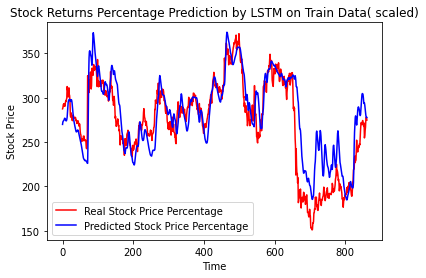

In [ ]:
plt.plot(a, color = 'red', label = 'Real Stock Price Percentage')
plt.plot(closing_price, color = 'blue', label = 'Predicted Stock Price Percentage')
plt.title('Stock Returns Percentage Prediction by LSTM on Train Data( scaled)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
closing_price = model.predict(x_test1)
print(closing_price.shape)


(149, 1)


In [ ]:
df_cp = pd.DataFrame(closing_price)
df_cp[1] = df_cp[0]
df_cp.head()
df_cp = scaler.inverse_transform(df_cp)
a = y_test.reshape(y_test.shape[0],1)
a.shape
a = pd.DataFrame(a)
a[1] = a[0]
a.head()
a = scaler.inverse_transform(a)
a = a[0:len(a),0]

closing_price = df_cp[0:len(df_cp),0]
rms=np.sqrt(np.mean(np.power((a-closing_price),2)))
rms

28.357453465709252

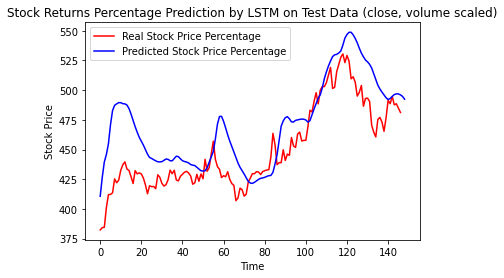

In [ ]:
plt.plot(a[0:len(a)-2], color = 'red', label = 'Real Stock Price Percentage')
plt.plot(closing_price, color = 'blue', label = 'Predicted Stock Price Percentage')
plt.title('Stock Returns Percentage Prediction by LSTM on Test Data (close, volume scaled)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
actual_pred_test = pd.DataFrame(closing_price, a)
actual_pred_test.to_csv("actual_pred_testdata_sbi2.csv")